## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [61]:
import pandas as pd
from copy import deepcopy

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [62]:
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'
data = pd.read_csv(url)
data

status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
..                                          ...       ...   
995                         no checking account        24   
996                         no checking account        24   
997  ... >= 200 DM / salary for at least 1 year        21   
998                                  ... < 0 DM        12   
999                         no checking account        30   

                                  credit_history              purpose  amount  \
0        all credits at this bank paid back duly           car (used)    1049   
1        all credits at this bank paid back duly               others    2799   
2    no credits taken/all credits paid back duly           retraining     841   
3        all credits at this bank paid back duly               others    2122   
4        all credits at this bank paid back duly               others    2171   
..                                           ...                  ...     ...   
995  no credits taken/all credits paid back duly  furniture/equipment    1987   
996  no credits taken/all credits paid back duly               others    2303   
997      all credits at this bank paid back duly               others   12680   
998  no credits taken/all credits paid back duly  furniture/equipment    6468   
999  no credits taken/all credits paid back duly           car (used)    6350   

                        savings employment_duration installment_rate  \
0    unknown/no savings account              < 1 yr             < 20   
1    unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
2                 ... <  100 DM    4 <= ... < 7 yrs   25 <= ... < 35   
3    unknown/no savings account    1 <= ... < 4 yrs   20 <= ... < 25   
4    unknown/no savings account    1 <= ... < 4 yrs             < 20   
..                          ...                 ...              ...   
995  unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
996  unknown/no savings account            >= 7 yrs             < 20   
997              ... >= 1000 DM            >= 7 yrs             < 20   
998              ... >= 1000 DM          unemployed   25 <= ... < 35   
999              ... >= 1000 DM            >= 7 yrs             < 20   

                      personal_status_sex other_debtors  ...  \
0    female : non-single or male : single          none  ...   
1                  male : married/widowed          none  ...   
2    female : non-single or male : single          none  ...   
3                  male : married/widowed          none  ...   
4                  male : married/widowed          none  ...   
..                                    ...           ...  ...   
995                male : married/widowed          none  ...   
996                male : married/widowed  co-applicant  ...   
997                male : married/widowed          none  ...   
998                male : married/widowed          none  ...   
999                male : married/widowed          none  ...   

                  property age  other_installment_plans   housing  \
0             car or other  21                     none  for free   
1    unknown / no property  36                     none  for free   
2    unknown / no property  23                     none  for free   
3    unknown / no property  39                     none  for free   
4             car or other  38                     bank      rent   
..                     ...  ..                      ...       ...   
995  unknown / no property  21                     none  for free   
996  unknown / no property  45                     none      rent   
997            real estate  30                     none       own   
998        

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [63]:
if data.isnull().any().any():
  print("Есть пропуски в данных")
else:
  print("Нет пропусков в данных")

Нет пропусков в данных


In [64]:
kolichestvennie = [i for i in data.columns if data[i].dtype.name == 'int64']
binarnie = ['telephone', 'foreign_worker', 'people_liable', 'credit_risk']
poryadkovie = ['savings', 'employment_duration', 'status', 'installment_rate',
               'present_residence ', 'number_credits']
kategorialnie = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors',
                 'property', 'other_installment_plans', 'housing', 'job']

print('Количественные:\n', kolichestvennie, '\n\nБинарные:\n', binarnie,
      '\n\nПорядковые:\n', poryadkovie, '\n\nКатегориальные:\n', kategorialnie)


Количественные:
 ['duration', 'amount', 'age'] 

Бинарные:
 ['telephone', 'foreign_worker', 'people_liable', 'credit_risk'] 

Порядковые:
 ['savings', 'employment_duration', 'status', 'installment_rate', 'present_residence ', 'number_credits'] 

Категориальные:
 ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [65]:
agg_mean = {'amount': 'mean'}
print('Средняя сумма кредита в каждой категории:\n\n',
      round(data.groupby(['purpose']).agg(agg_mean), 3))

Средняя сумма кредита в каждой категории:

                        amount
purpose                      
business             8209.333
car (new)            5370.223
car (used)           3066.983
domestic appliances  2728.091
furniture/equipment  2487.686
others               3062.949
radio/television     1498.000
repairs              3180.400
retraining           4158.041
vacation             1205.889


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [66]:
clients_under_30 = data.loc[data['age'] < 30]
print("Процент клиентов моложе 30, которые снимают жильё:",
      round(((clients_under_30.loc[data['housing'] == 'rent'].shape[0])/(clients_under_30.shape[0])*100),3))
clients_over_40 = data.loc[data['age'] > 40]
print("Процент клиентов старше 40, которые снимают жильё:",
      round(((clients_over_40.loc[data['housing'] == 'rent'].shape[0])/(clients_over_40.shape[0])*100),3))

Процент клиентов моложе 30, которые снимают жильё: 66.667
Процент клиентов старше 40, которые снимают жильё: 68.015


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [67]:
data.loc[(data['foreign_worker'] == 'yes') & (data['number_credits'] > str(3))].shape[0]

1

### Задание 6 (1 балл)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

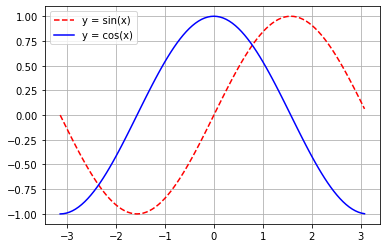

In [69]:
x = np.arange(-(np.pi), np.pi, 2 * np.pi / 100)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.grid(True)

plt.plot(x, y_1, 'r--', label="y = sin(x)")
plt.plot(x, y_2, 'b', label="y = cos(x)")
plt.legend()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

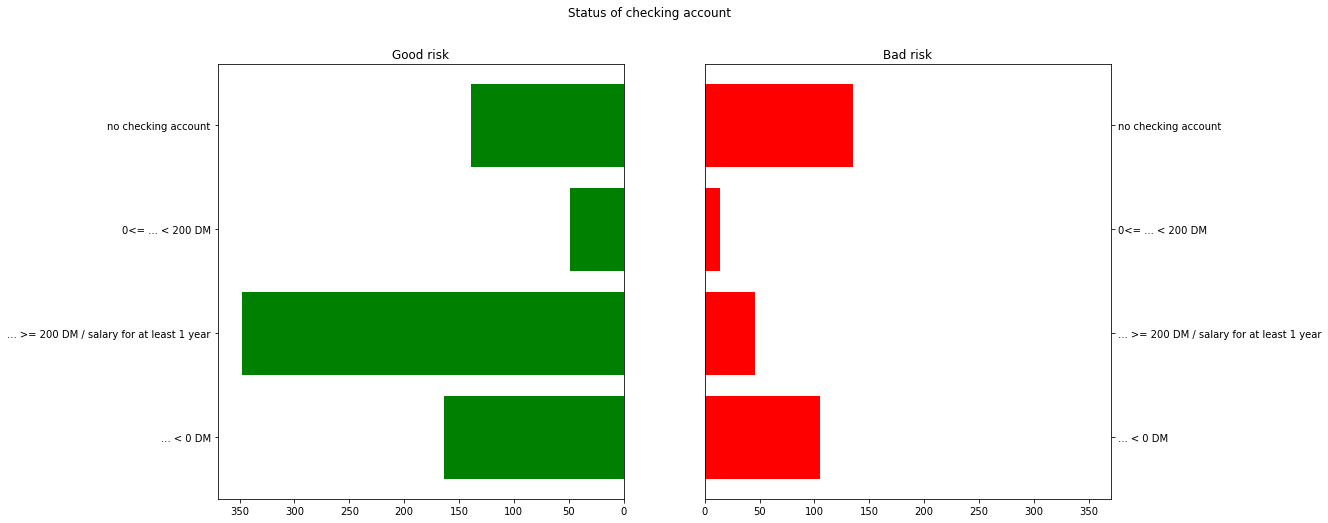

In [70]:
a = data.value_counts(subset=['status', 'credit_risk'], sort=False)
y_val = np.array([])
good_values = np.array([])
bad_values = np.array([])
for i in range(len(a.index)):
    if i % 2:
        y_val = np.append(y_val, a.index[i][0])
        good_values = np.append(good_values, a[i])
    else:
        bad_values = np.append(bad_values, a[i])

plt.figure(figsize=(16, 8))
plt.suptitle('Status of checking account')
        
plt.subplot (1, 2, 1)
plt.gca().set_xlim([0, 370])
plt.title('Good risk')
plt.barh(y_val, good_values, color = 'green')
plt.gca().invert_xaxis()


plt.subplot(1, 2, 2)
plt.gca().set_xlim([0, 370])
plt.title('Bad risk')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.barh(y_val, bad_values, color = 'red')

plt.show()

### Задание 8  (0.5 балла)

In [71]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

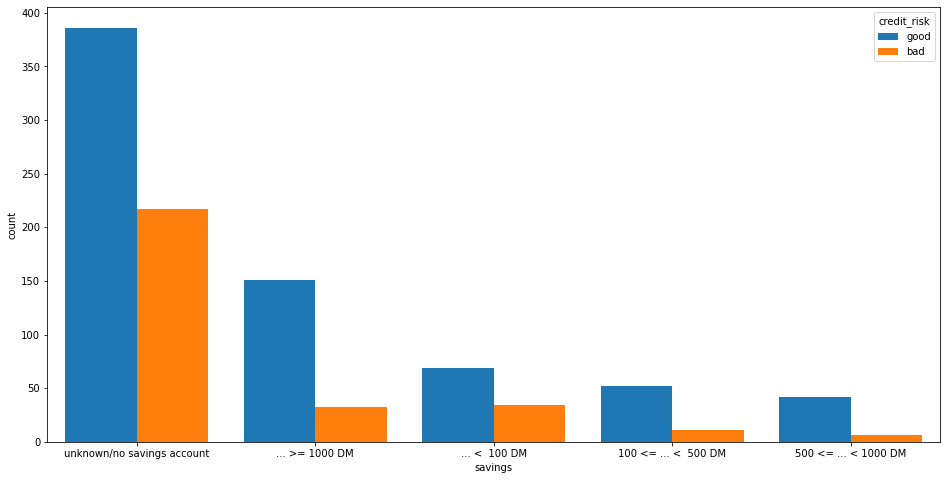

In [72]:
df = data.value_counts(subset=['savings', 'credit_risk'], 
                               sort = True).reset_index()
df = df.rename(columns = {0: 'count'})

count_savings = plt.figure(figsize=(16, 8))

count_savings = sns.barplot(x = 'savings',
                            y = 'count',
                            hue = 'credit_risk',
                            data = df,
                            saturation = 1)
plt.show()

# Очевидно, мне больше нравится вариант с построением с помощью seaborn.
# Шикарная библиотека, которая расширяет функционал mathplotlib.
# Разница в результате выглядит нагляднее, код - читабельнее, и его лече править не создателю 
# Лайк

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

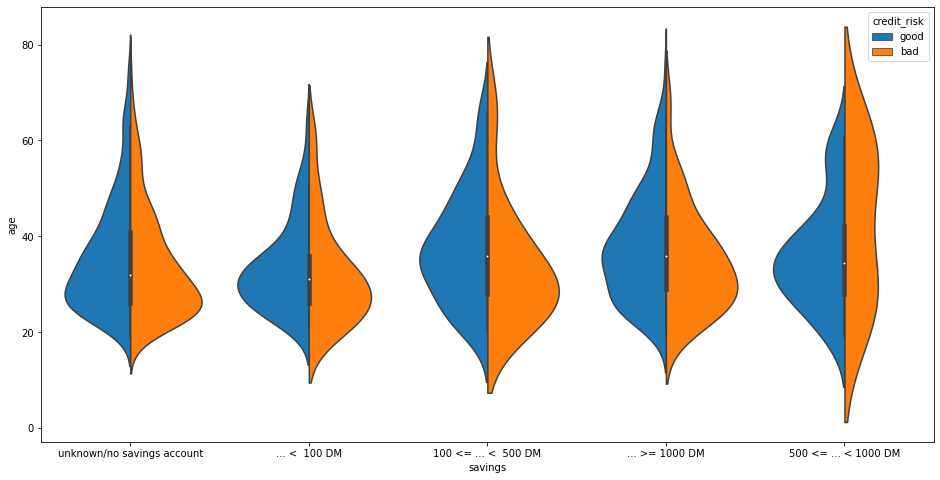

In [73]:
age_savings_violin = plt.figure(figsize=(16, 8))

age_savings_violin = sns.violinplot(x = 'savings', 
                                    y = 'age',
                                    hue = 'credit_risk', 
                                    data = data,
                                    saturation = 1,
                                    split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

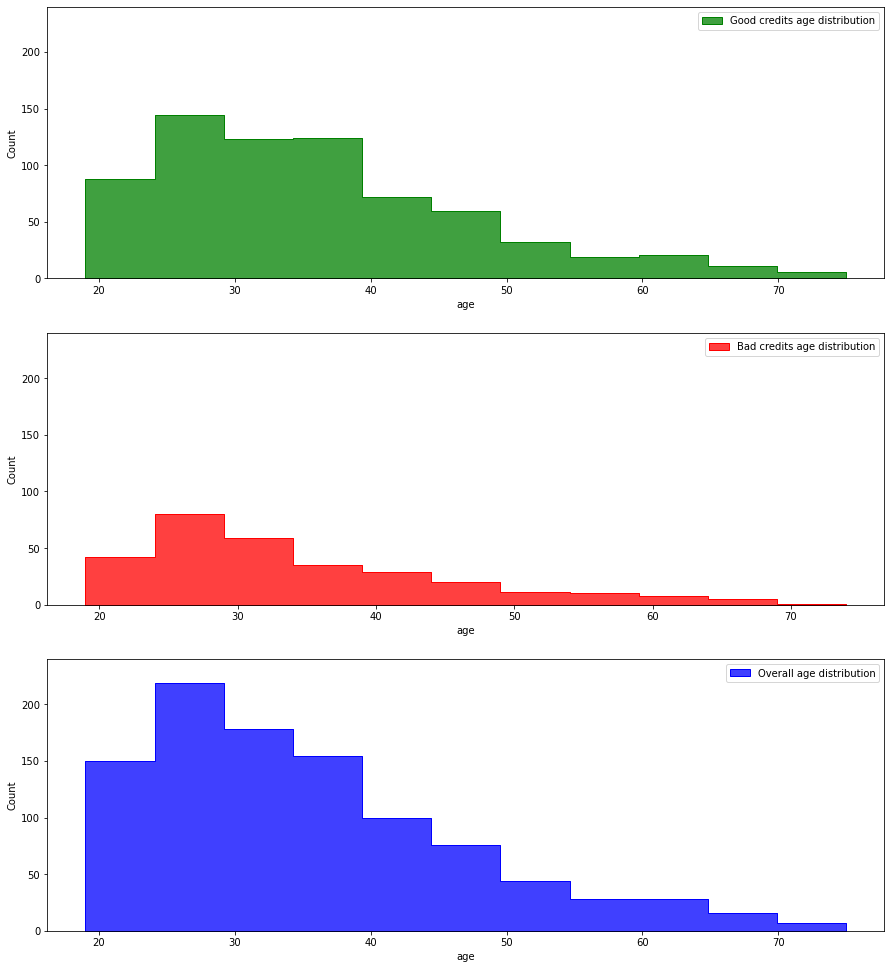

In [74]:
plt.figure(figsize=(15, 17))
plt.subplot (3, 1, 1)
Td_good = sns.histplot(x = data.age[data.credit_risk == 'good'],
                       bins = 11,
                       element="step",
                       color = 'green',
                       label = 'Good credits age distribution',
                       kde = False)
Td_good.set_ylim([0, 240])
plt.legend()

plt.subplot (3, 1, 2)
Td_bad = sns.histplot(x = data.age[data.credit_risk == 'bad'],
                      bins = 11,
                      element="step",
                      color = 'red',
                      label = 'Bad credits age distribution',
                      kde = False)
Td_bad.set_ylim([0, 240])
plt.legend()

plt.subplot (3, 1, 3)
Td_overall = sns.histplot(x = data['age'], 
                          bins = 11,
                          element="step",
                          color = 'blue', 
                          label = 'Overall age distribution',
                          kde = False)
Td_overall.set_ylim([0, 240])
plt.legend()

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

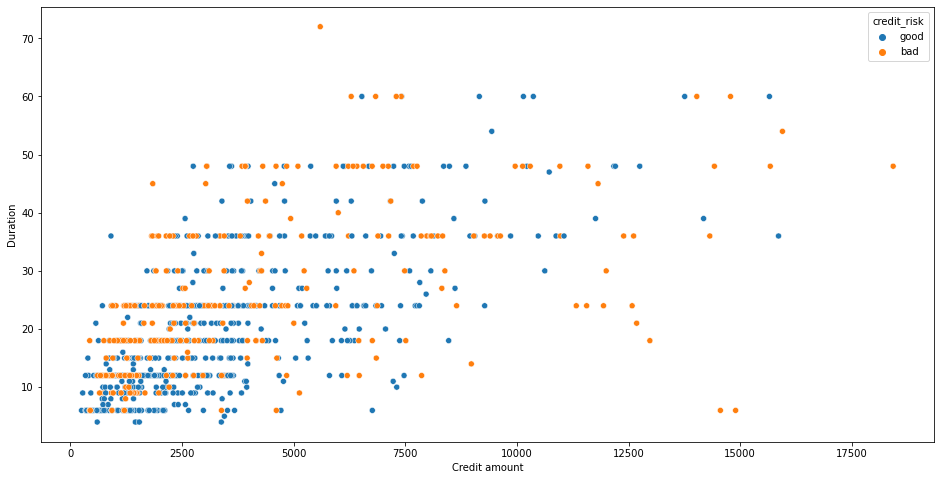

In [75]:
duration_amount = plt.figure(figsize=(16, 8))

duration_amount.gca().set_xlabel('Credit amount') 
duration_amount.gca().set_ylabel('Duration')  

duration_amount = sns.scatterplot(x = 'amount',
                                  y = 'duration',
                                  hue = 'credit_risk',
                                  data = data)

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

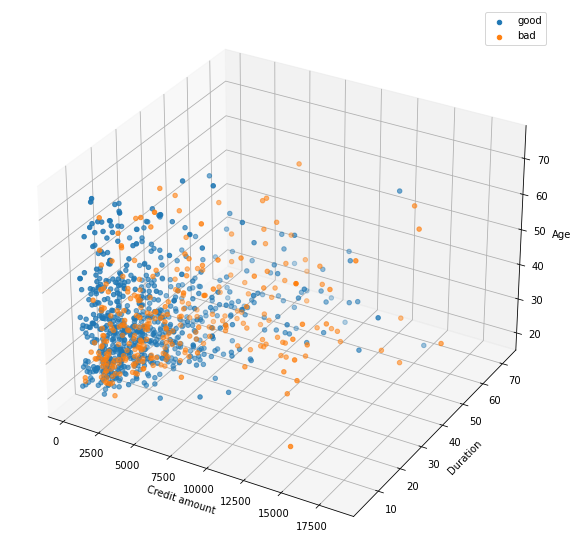

In [76]:
fig = plt.figure(figsize=(16, 10)) 
TD_diag = fig.add_subplot( projection = '3d') 

TD_diag.set_xlabel('Credit amount')
TD_diag.set_ylabel('Duration')
TD_diag.set_zlabel('Age')

for i in data.credit_risk.unique():
    TD_diag.scatter(data.amount[data.credit_risk == i],
                    data.duration[data.credit_risk == i],
                    data.age[data.credit_risk == i], label = i)

TD_diag.legend()
plt.show()

### Задание 13  (0.5 балла)

In [77]:
print('Количественные:\n', kolichestvennie, '\n\nБинарные:\n', binarnie,
      '\n\nПорядковые:\n', poryadkovie, '\n\nКатегориальные:\n', kategorialnie)


Количественные:
 ['duration', 'amount', 'age'] 

Бинарные:
 ['telephone', 'foreign_worker', 'people_liable', 'credit_risk'] 

Порядковые:
 ['savings', 'employment_duration', 'status', 'installment_rate', 'present_residence ', 'number_credits'] 

Категориальные:
 ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']


In [86]:
# Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от кадого столбца таблицы
# (Подставим в задание 8) 
# Сравним отношения по кредитному риску и расставим веса
# По какому параметру будет наименьшее отношение, там выставляем максимальный коэффициент и т.д.
# Столбцы удалялись либо потому что котегориальные
# Либо потому что этот признак не вносил особой значенмости

data_final = deepcopy(data)


def delete_categories():
  data_final.drop(['purpose','personal_status_sex','telephone','foreign_worker', 'age', 'people_liable', 'credit_risk'], axis=1, inplace=True)


def status_to_score():
  #print(data_final['status'].unique())
  data_final['status'] = np.select(
      [
          data_final['status'] == 'no checking account', 
          data_final['status'] == '... < 0 DM',
          data_final['status'] == '0<= ... < 200 DM',
          data_final['status'] == '... >= 200 DM / salary for at least 1 year'    
      ], 
      [
          0, 
          1,
          2,
          3
      ]
  )


def duration_to_score():
  #print(data_final['duration'].unique())
  data_final['duration'] = np.select(
      [
          data_final['duration'] < 18, 
          ((18 <= data_final['duration']) & (data_final['duration'] < 27)),
          ((27 <= data_final['duration']) & (data_final['duration'] < 42)),
          data_final['duration'] > 42
      ], 
      [
          3,
          2,
          1,
          0
      ]
  )


def credit_history_to_score():
  #print(data_final['credit_history'].unique())
  data_final['credit_history'] = np.select(
      [
          data_final['credit_history'] == 'all credits at this bank paid back duly', 
          data_final['credit_history'] == 'no credits taken/all credits paid back duly',
          data_final['credit_history'] == 'existing credits paid back duly till now',
          data_final['credit_history'] == 'delay in paying off in the past',
          data_final['credit_history'] == 'critical account/other credits elsewhere'
      ], 
      [
          4,
          3,
          2,
          1,
          0
      ]
  )


def amount_to_score():
  #print(data_final['amount'].unique())
  data_final['amount'] = np.select(
      [
          data_final['amount'] <= 4500, 
          data_final['amount'] > 10200
      ], 
      [
          2,
          0
      ],
      default = 1
  )


def savings_to_score():
  #print(data_final['savings'].unique())
  data_final['savings'] = np.select(
      [
          data_final['savings'] == 'unknown/no savings account',
          data_final['savings'] == '... <  100 DM', 
          data_final['savings'] == '100 <= ... <  500 DM',
          data_final['savings'] == '... >= 1000 DM',
          data_final['savings'] == '500 <= ... < 1000 DM'
       
      ], 
      [
          0,
          1,
          2,
          4,
          3
      ]
  )


def employment_duration_to_score():
  #print(data_final['employment_duration'].unique())
  data_final['employment_duration'] = np.select(
      [
          data_final['employment_duration'] == 'unemployed',
          data_final['employment_duration'] == '< 1 yr', 
          data_final['employment_duration'] == '1 <= ... < 4 yrs',
          data_final['employment_duration'] == '4 <= ... < 7 yrs',
          data_final['employment_duration'] == '>= 7 yrs'
       
      ], 
      [
          1,
          0,
          2,
          4,
          3
      ]
  )


def installment_rate_to_score():
  #print(data_final['installment_rate'].unique())
  data_final['installment_rate'] = np.select(
      [
          data_final['installment_rate'] == '< 20',
          data_final['installment_rate'] == '20 <= ... < 25', 
          data_final['installment_rate'] == '25 <= ... < 35',
          data_final['installment_rate'] == '>= 35'
       
      ], 
      [
          0,
          1,
          2,
          3
      ]
  )


def other_debtors_to_score():
  #print(data_final['other_debtors'].unique())
  data_final['other_debtors'] = np.select(
      [
          data_final['other_debtors'] == 'none',
          data_final['other_debtors'] == 'co-applicant', 
          data_final['other_debtors'] == 'guarantor'
       
      ], 
      [
          1,
          0,
          2
      ]
  )
def present_residence_to_score():
  #print(data_final['present_residence'].unique())
  data_final['present_residence'] = np.select(
      [
          data_final['present_residence'] == '< 1 yr',
          data_final['present_residence'] == '1 <= ... < 4 yrs',
          data_final['present_residence'] == '4 <= ... < 7 yrs',
          data_final['present_residence'] == '>= 7 yrs'
       
      ], 
      [
          0,
          1,
          2,
          3
      ]
  )


def property_to_score():
  #print(data_final['property'].unique())
  data_final['property'] = np.select(
      [
          data_final['property'] == 'unknown / no property',
          data_final['property'] == 'car or other',
          data_final['property'] == 'building soc. savings agr./life insurance',
          data_final['property'] == 'real estate'
       
      ], 
      [
          3,
          2,
          1,
          0
      ]
  )


def other_installment_plans_to_score():
  #print(data_final['other_installment_plans'].unique())
  data_final['other_installment_plans'] = np.select(
      [
          data_final['other_installment_plans'] == 'none',
          data_final['other_installment_plans'] == 'stores',
          data_final['other_installment_plans'] == 'bank'
       
      ], 
      [
          2,
          1,
          0
      ]
  )


def housing_to_score():
  #print(data_final['housing'].unique())
  data_final['housing'] = np.select(
      [
          data_final['housing'] == 'rent',
          data_final['housing'] == 'for free',
          data_final['housing'] == 'own'
       
      ], 
      [
          2,
          1,
          0
      ]
  )


def number_credits_to_score():
  #print(data_final['number_credits'].unique())
  data_final['number_credits'] = np.select(
      [
          data_final['number_credits'] == '4-5',
          data_final['number_credits'] == '2-3',
          data_final['number_credits'] == '1',
          data_final['number_credits'] == '>= 6'
       
      ], 
      [
          3,
          2,
          1,
          0
      ]
  )


def job_to_score():
  #print(data_final['job'].unique())
  data_final['job'] = np.select(
      [
          data_final['job'] == 'unskilled - resident',
          data_final['job'] == 'skilled employee/official',
          data_final['job'] == 'unemployed/unskilled - non-resident',
          data_final['job'] == 'manager/self-empl./highly qualif. employee'
       
      ], 
      [
          3,
          2,
          1,
          0
      ]
  )


delete_categories()
status_to_score()
duration_to_score()
credit_history_to_score()
amount_to_score()
savings_to_score()
employment_duration_to_score()
installment_rate_to_score()
other_debtors_to_score()
present_residence_to_score()
property_to_score()
other_installment_plans_to_score()
housing_to_score()
number_credits_to_score()
job_to_score()

data_final


status  duration  credit_history  amount  savings  employment_duration  \
0         0         2               4       2        0                    0   
1         0         3               4       2        0                    2   
2         1         3               3       2        1                    4   
3         0         3               4       2        0                    2   
4         0         3               4       2        0                    2   
..      ...       ...             ...     ...      ...                  ...   
995       0         2               3       2        0                    2   
996       0         2               3       2        0                    3   
997       3         2               4       0        4                    3   
998       1         3               3       1        4                    1   
999       0         1               3       1        4                    3   

     installment_rate  other_debtors  present_residence  property  \
0                   0              1                  3         2   
1                   2              1                  1         3   
2                   2              1                  3         3   
3                   1              1                  1         3   
4                   0              1                  3         2   
..                ...            ...                ...       ...   
995                 2              1                  3         3   
996                 0              0                  0         3   
997                 0              1                  3         0   
998                 2              1                  0         0   
999                 0              1                  3         2   

     other_installment_plans  housing  number_credits  job  
0                          2        1               1    2  
1                          2        1               2    2  
2                          2        1               1    3  
3                          2        1               2    3  
4                          0        2               2    3  
..                       ...      ...             ...  ...  
995                        2        1               1    3  
996                        2        2               1    2  
997                        2        0               1    0  
998                        2        2               1    0  
999                        2        2               1    2  

[1000 rows x 14 columns]

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [90]:
def predict(Xtest: np.array) -> np.array:
    answ_array = []
    for i in Xtest:
      answ_array.append('good' if i.sum() >= 22 else 'bad')
    
    return answ_array

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data_final.values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=999, random_state=8)

accuracy_score(y_test, predict(X_test))

0.7387387387387387